In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot #for cooks distance
import statsmodels.formula.api as smf

In [ ]:
data = pd.read_csv("/content/ToyotaCorolla.csv",encoding= 'unicode_escape')
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [ ]:
data2 = data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [ ]:
data3=data2.rename({'Age_08_04':'age','Doors':'doors',
                    'Gears' : 'gears','Quarterly_Tax':'QT'},axis=1)

In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   doors   1436 non-null   int64
 6   gears   1436 non-null   int64
 7   QT      1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [ ]:
data3[data3.duplicated()]

,Price,age,KM,HP,cc,doors,gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [ ]:
data4 = data3.drop_duplicates().reset_index(drop=True)
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1435 non-null   int64
 1   age     1435 non-null   int64
 2   KM      1435 non-null   int64
 3   HP      1435 non-null   int64
 4   cc      1435 non-null   int64
 5   doors   1435 non-null   int64
 6   gears   1435 non-null   int64
 7   QT      1435 non-null   int64
 8   Weight  1435 non-null   int64
dtypes: int64(9)
memory usage: 101.0 KB


In [ ]:
data4.describe()

,Price,age,KM,HP,cc,doors,gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


## **Corellation matrix**

<Axes: >

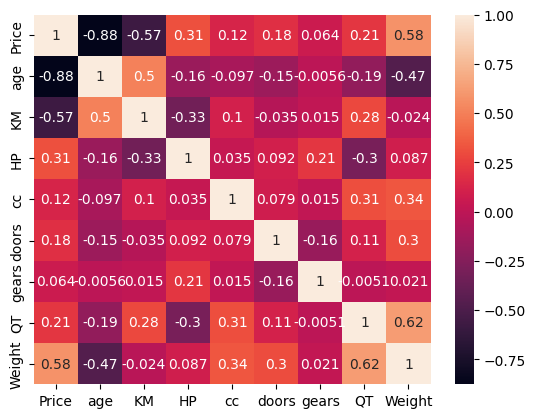

In [ ]:
sns.heatmap(data4.corr(), annot=True)

# **ScattorPlot Between Variables**

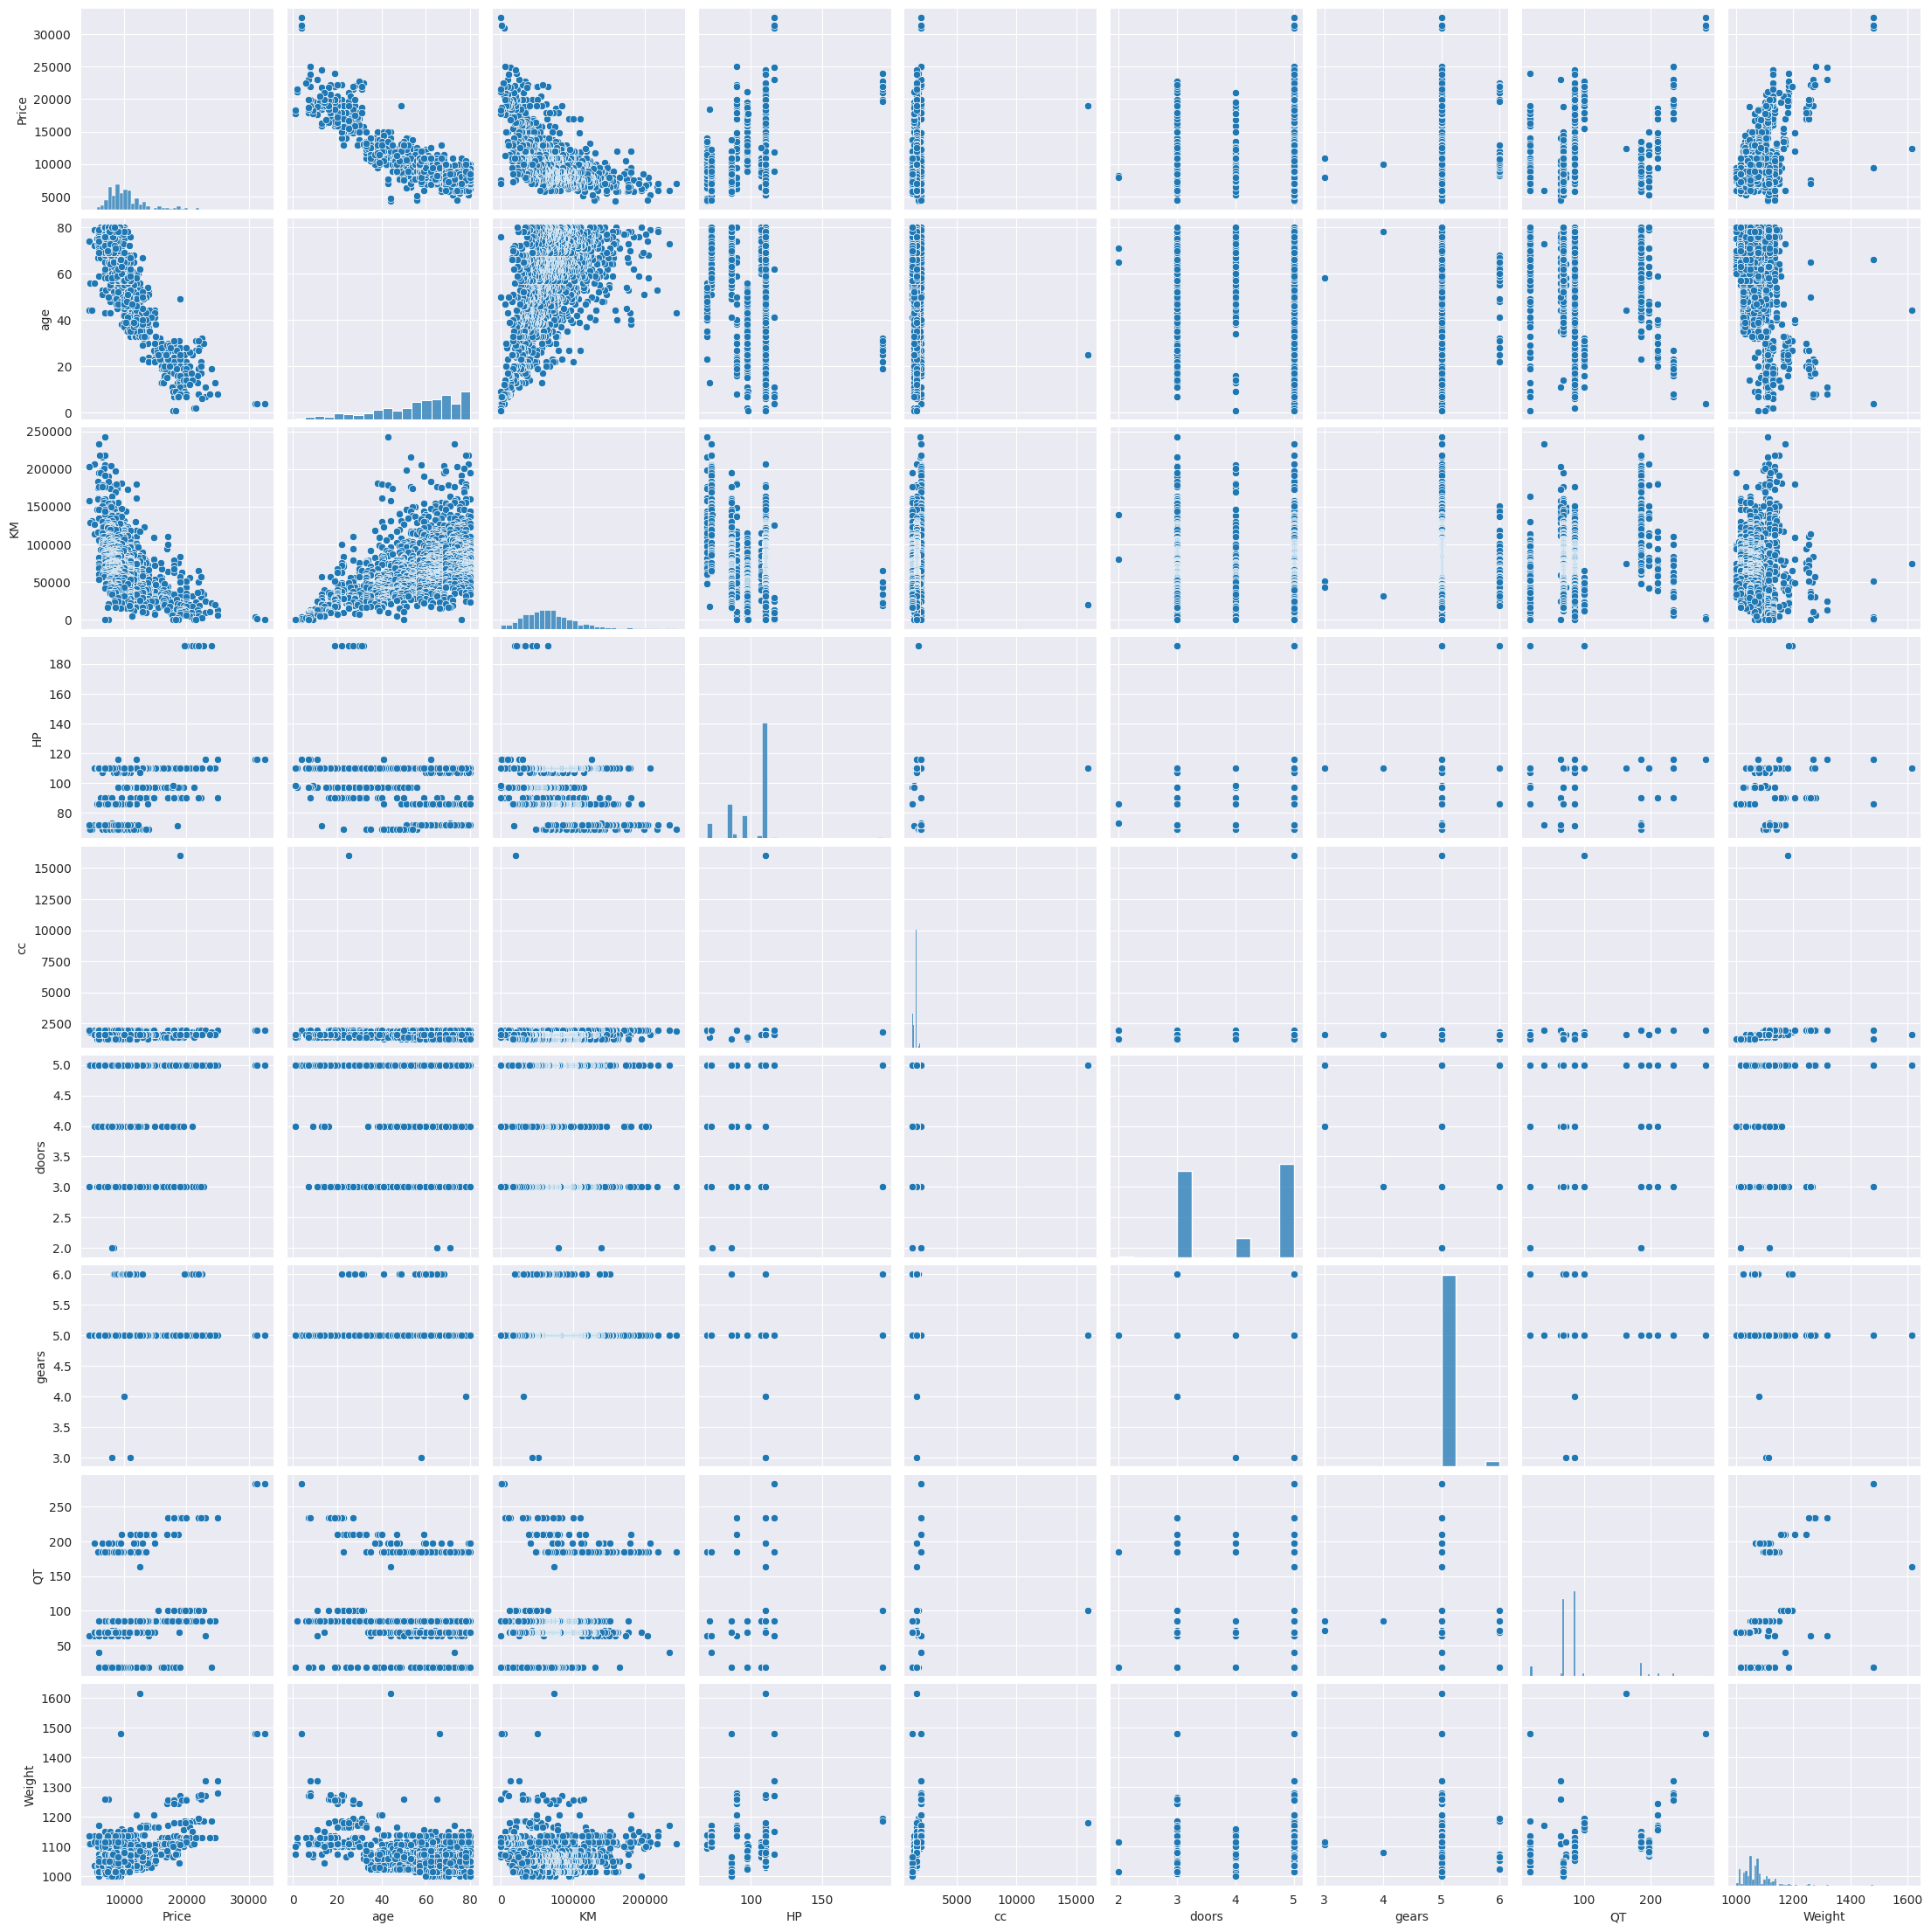

In [ ]:
sns.set_style(style = 'darkgrid')
sns.pairplot(data4)

# **Preparing a model**

In [ ]:
model=smf.ols('Price~age+KM+HP+cc+doors+gears+QT+Weight',data=data4).fit()

In [ ]:
model.params

Intercept   -5472.540368
age          -121.713891
KM             -0.020737
HP             31.584612
cc             -0.118558
doors          -0.920189
gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [ ]:
model.tvalues , np.round(model.pvalues,5)

(Intercept    -3.875273
 age         -46.551876
 KM          -16.552424
 HP           11.209719
 cc           -1.316436
 doors        -0.023012
 gears         3.034563
 QT            2.944198
 Weight       15.760663
 dtype: float64,
 Intercept    0.00011
 age          0.00000
 KM           0.00000
 HP           0.00000
 cc           0.18824
 doors        0.98164
 gears        0.00245
 QT           0.00329
 Weight       0.00000
 dtype: float64)

In [ ]:
(model.rsquared,model.rsquared_adj)

(0.8625200256947001, 0.8617487495415147)

# **Simple Linear regression**

In [ ]:
ml_c=smf.ols('Price~cc',data=data4).fit()
ml_c.tvalues , ml_c.pvalues

(Intercept    24.879592
 cc            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 cc            2.292856e-06
 dtype: float64)

In [ ]:
ml_d=smf.ols('Price~doors',data=data4).fit()
ml_d.tvalues , ml_d.pvalues

(Intercept    19.421546
 doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 doors        2.404166e-12
 dtype: float64)

In [ ]:
ml_cd=smf.ols('Price~cc+doors',data=data4).fit()
ml_cd.tvalues , ml_cd.pvalues

(Intercept    12.786341
 cc            4.268006
 doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 cc           2.101878e-05
 doors        2.109558e-11
 dtype: float64)

# **Calculating VIF**

In [ ]:
rsq_age = smf.ols('age~KM+HP+cc+doors+gears+QT+Weight',data=data4).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_km = smf.ols('KM~age+HP+cc+doors+gears+QT+Weight',data=data4).fit().rsquared
vif_km=1/(1-rsq_km)

rsq_hp = smf.ols('HP~KM+age+cc+doors+gears+QT+Weight',data=data4).fit().rsquared
vif_hp=1/(1-rsq_age)

rsq_cc = smf.ols('cc~KM+HP+age+doors+gears+QT+Weight',data=data4).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_d = smf.ols('doors~KM+HP+cc+age+gears+QT+Weight',data=data4).fit().rsquared
vif_d=1/(1-rsq_d)

rsq_g = smf.ols('gears~KM+HP+cc+doors+age+QT+Weight',data=data4).fit().rsquared
vif_g=1/(1-rsq_g)

rsq_QT= smf.ols('QT~KM+HP+cc+doors+gears+age+Weight',data=data4).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_w = smf.ols('Weight~KM+HP+cc+doors+gears+QT+age',data=data4).fit().rsquared
vif_w=1/(1-rsq_w)

df={'Variables':['age','KM','HP','cc','doors','gears','QT','Weight'],
    'Vif':[vif_age,vif_km,vif_hp,vif_cc,vif_d,vif_g,vif_QT,vif_w]}
Vif_df=pd.DataFrame(df)
Vif_df



,Variables,Vif
0,age,1.876236
1,KM,1.757178
2,HP,1.876236
3,cc,1.163470
4,doors,1.155890
5,gears,1.098843
6,QT,2.295375
7,Weight,2.487180


# **Residual Analysis**

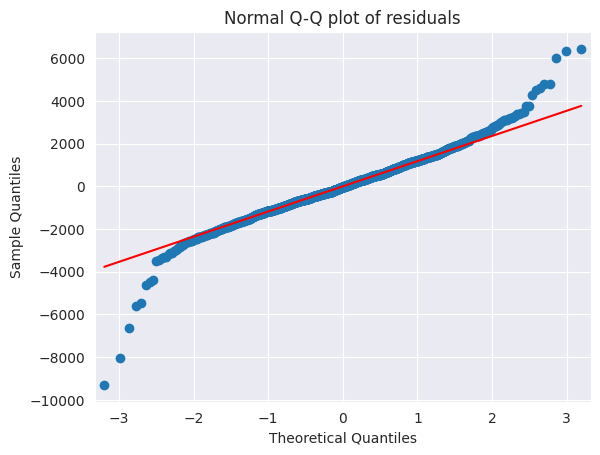

In [ ]:
#Q-Q Plot
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
#Outliers
print(list(np.where(model.resid > 6000)))
list(np.where(model.resid < -6000))

[array([109, 146, 522])]


[array([220, 600, 959])]

# **Residual PLot for Homoscendasticity**

In [ ]:
def get_standardized_values( vals):
  return (vals - vals.mean())/vals.std()

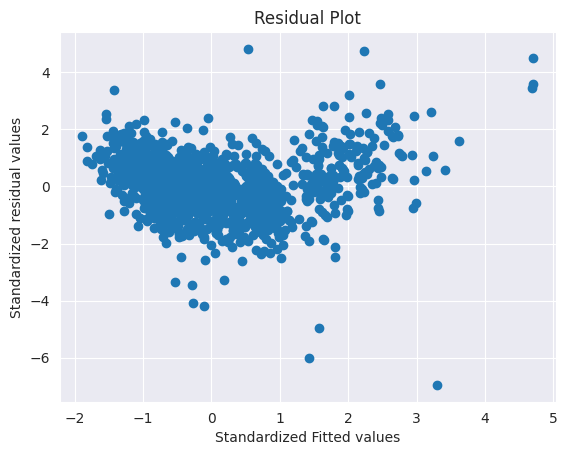

In [ ]:
# ei vs yi
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# **Residuals vs Regressors**

eval_env: 1


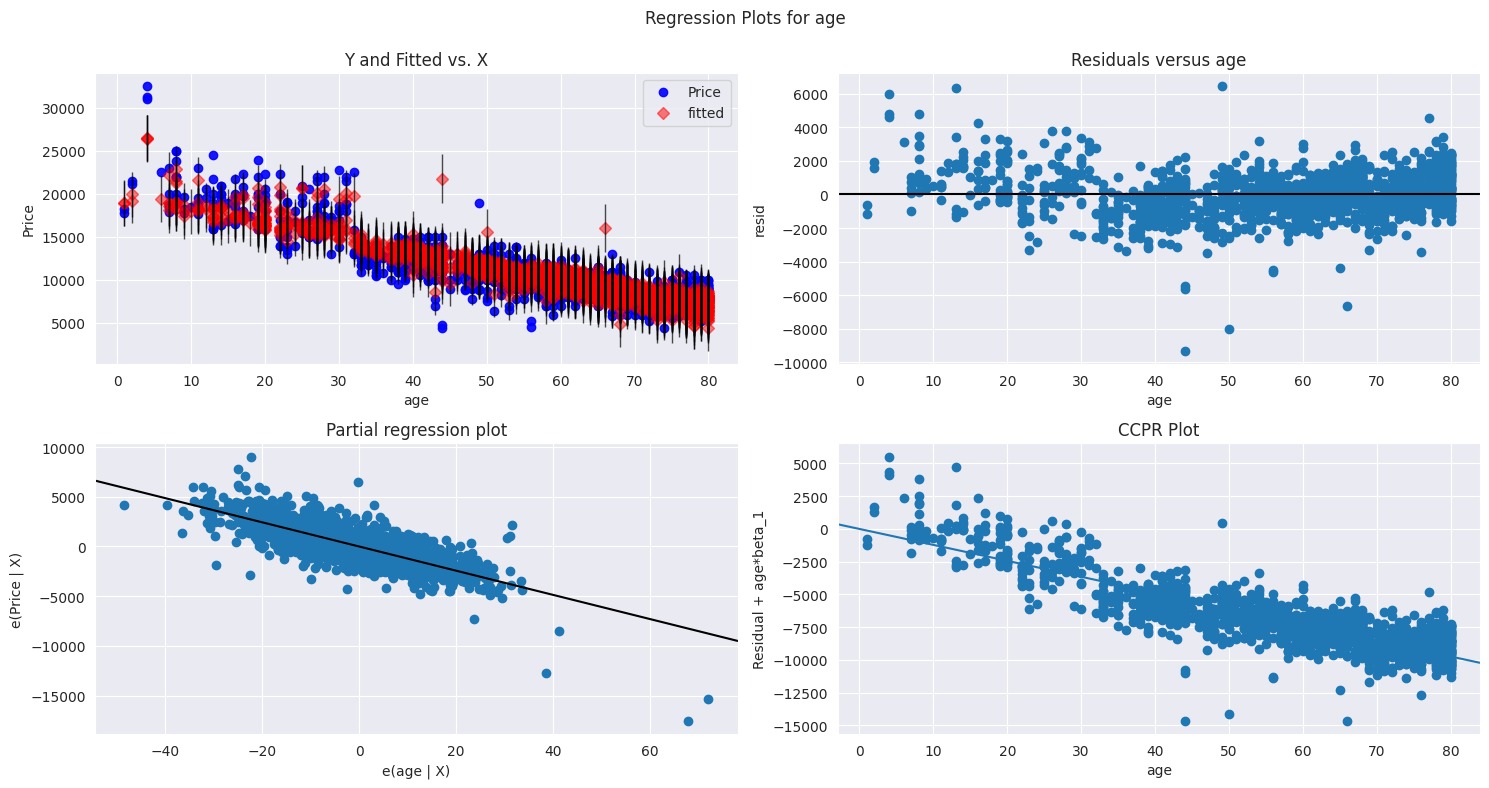

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"age", fig=fig)
plt.show()

eval_env: 1


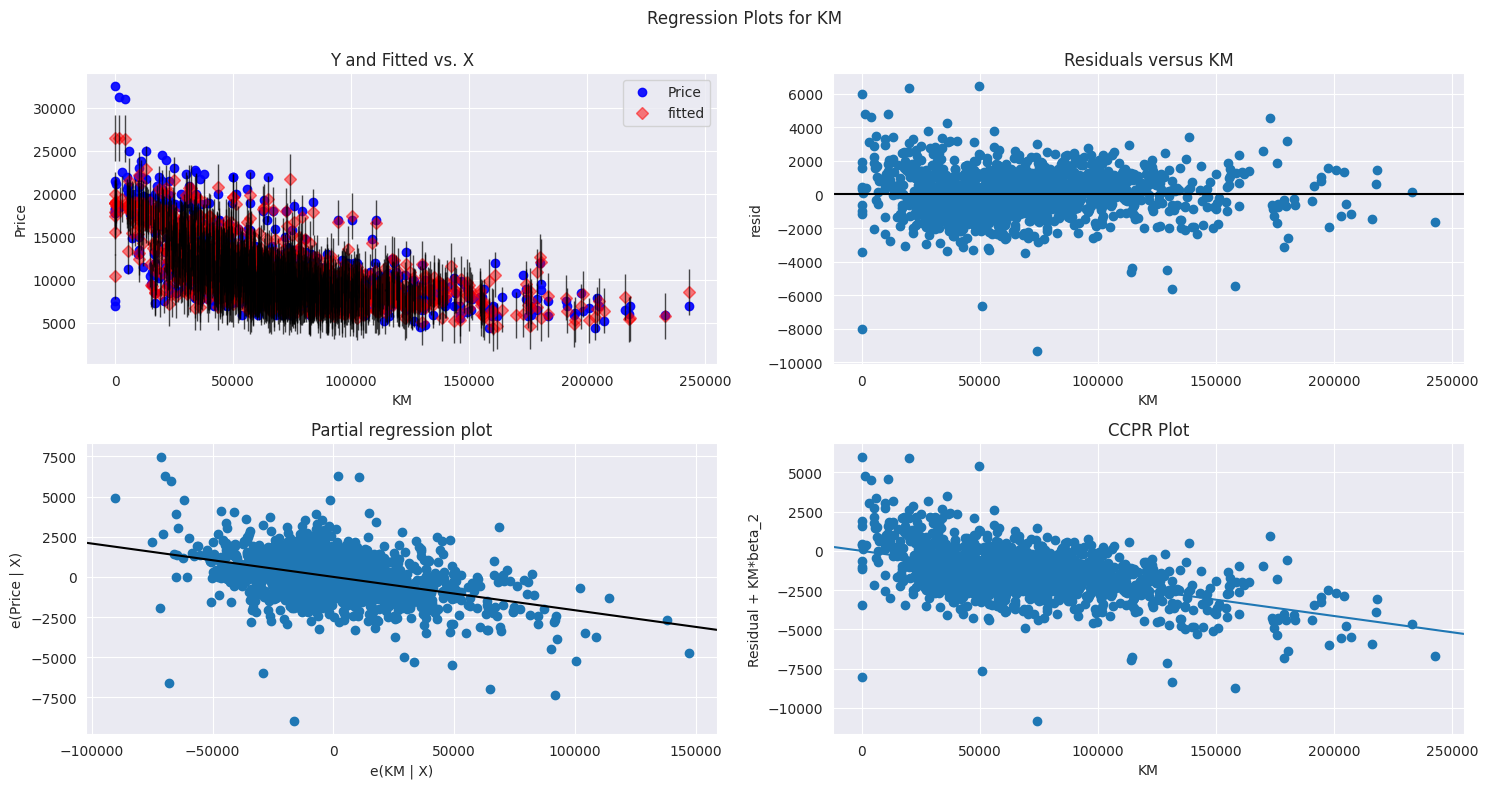

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"KM", fig=fig)
plt.show()

eval_env: 1


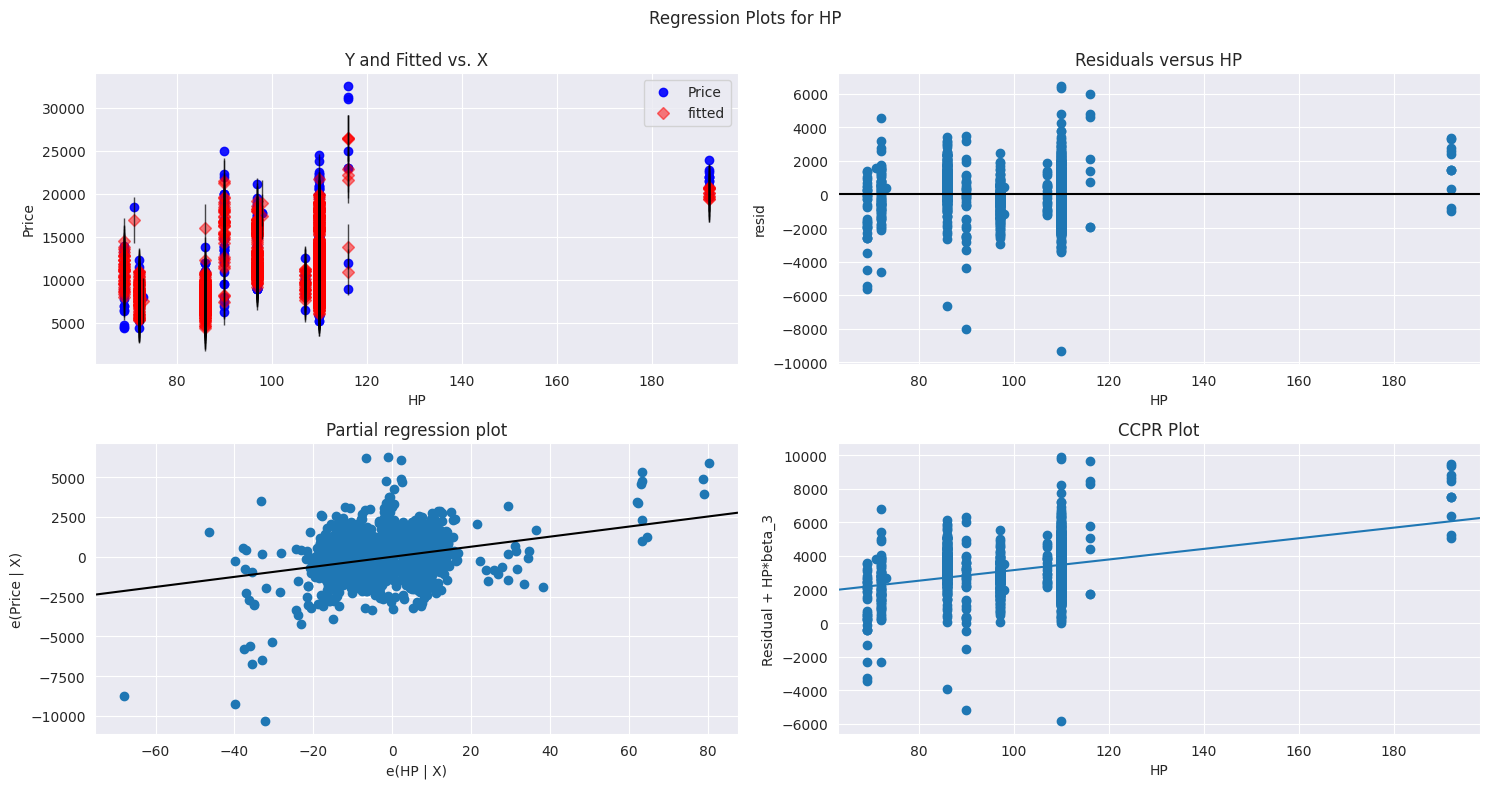

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"HP", fig=fig)
plt.show()

eval_env: 1


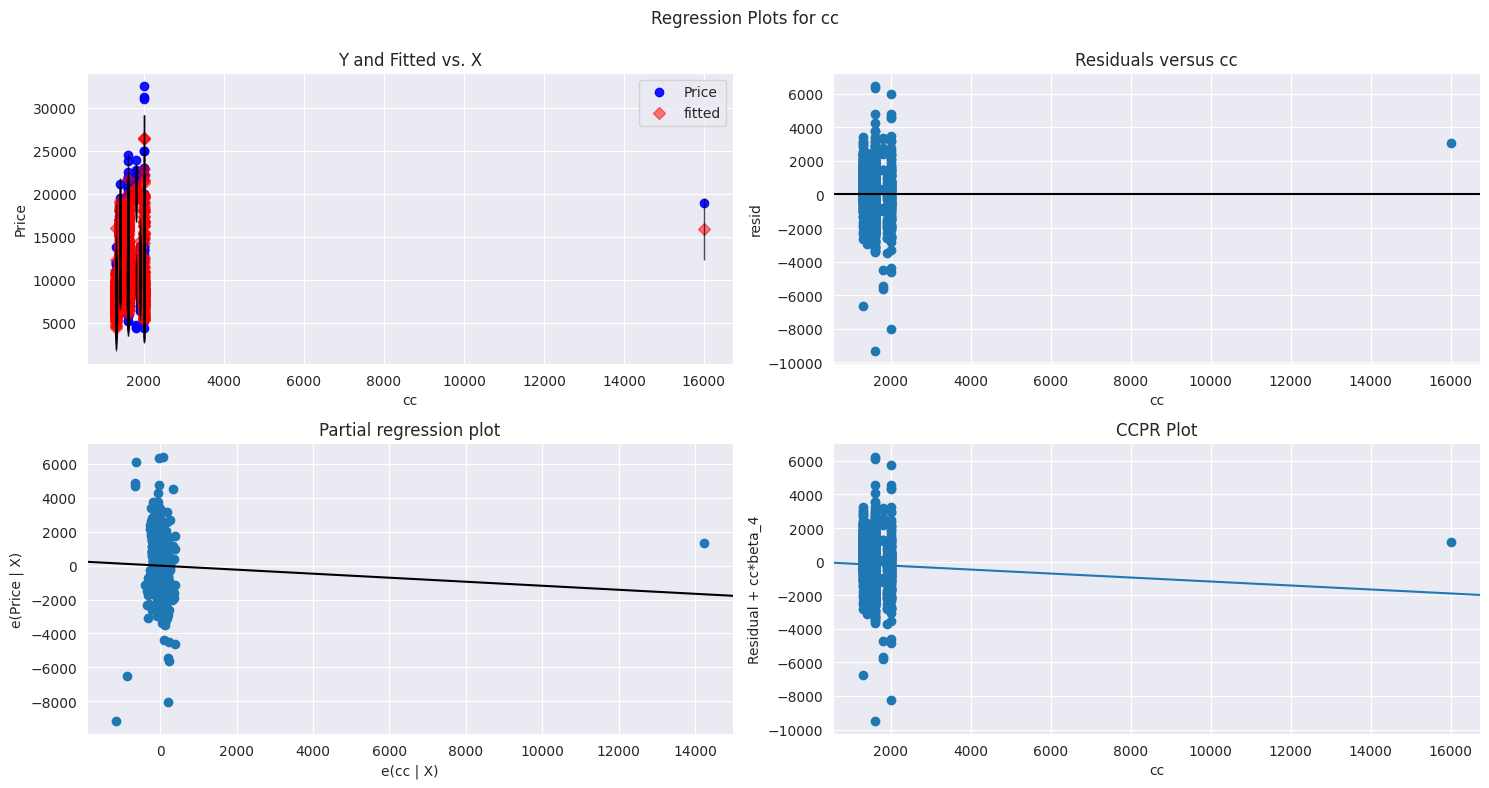

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"cc", fig=fig)
plt.show()

eval_env: 1


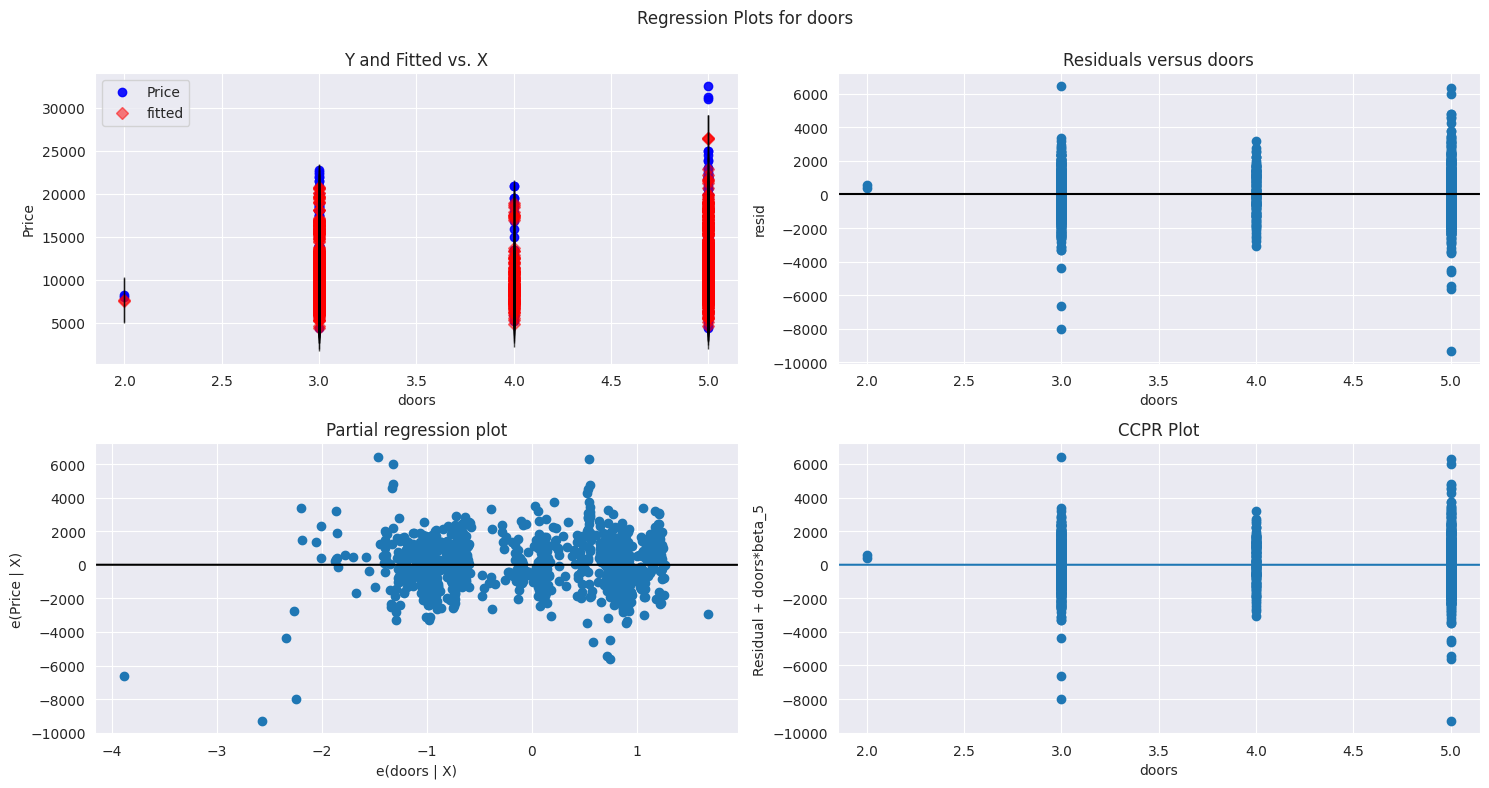

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"doors", fig=fig)
plt.show()

eval_env: 1


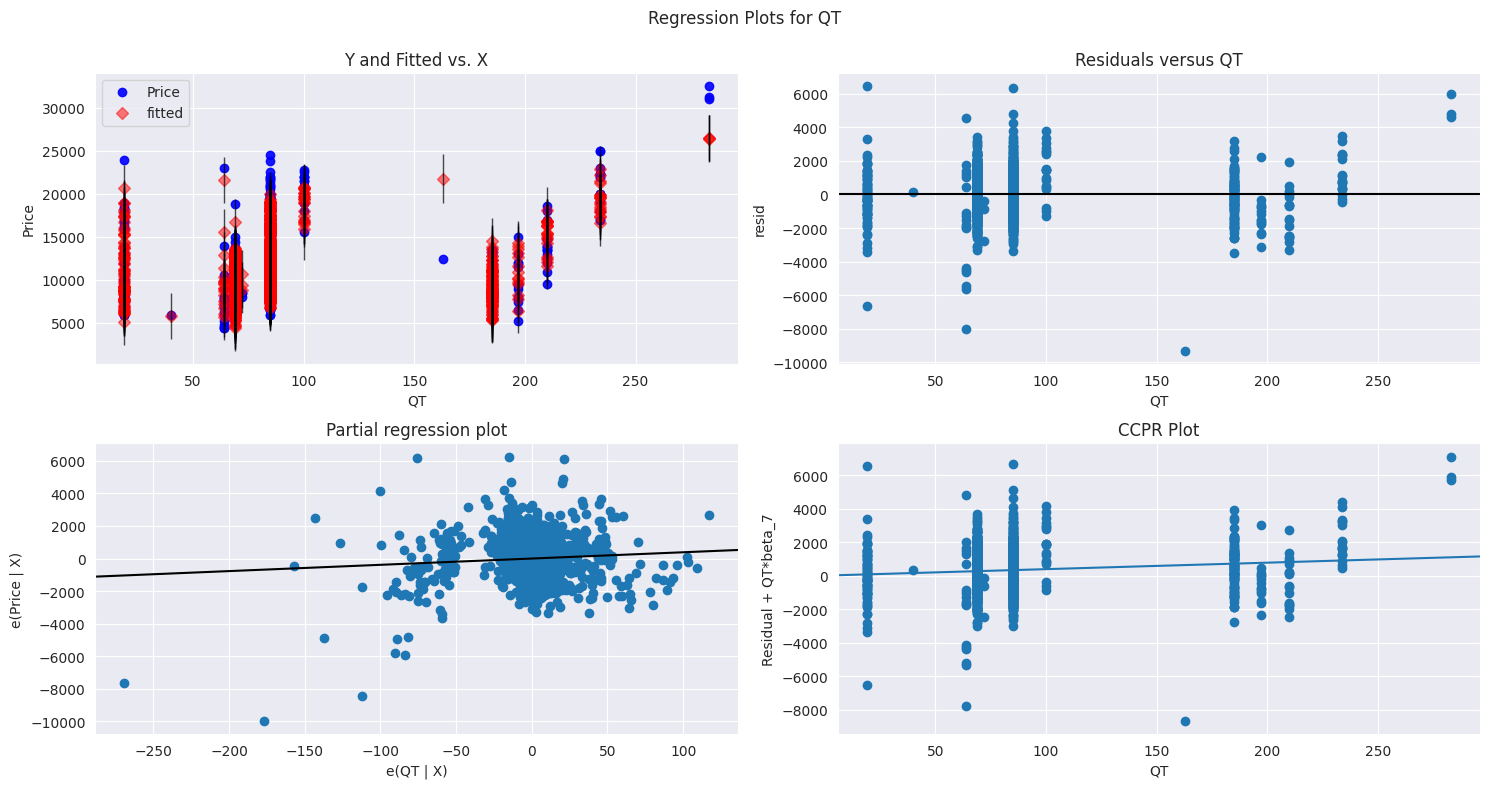

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"QT", fig=fig)
plt.show()

eval_env: 1


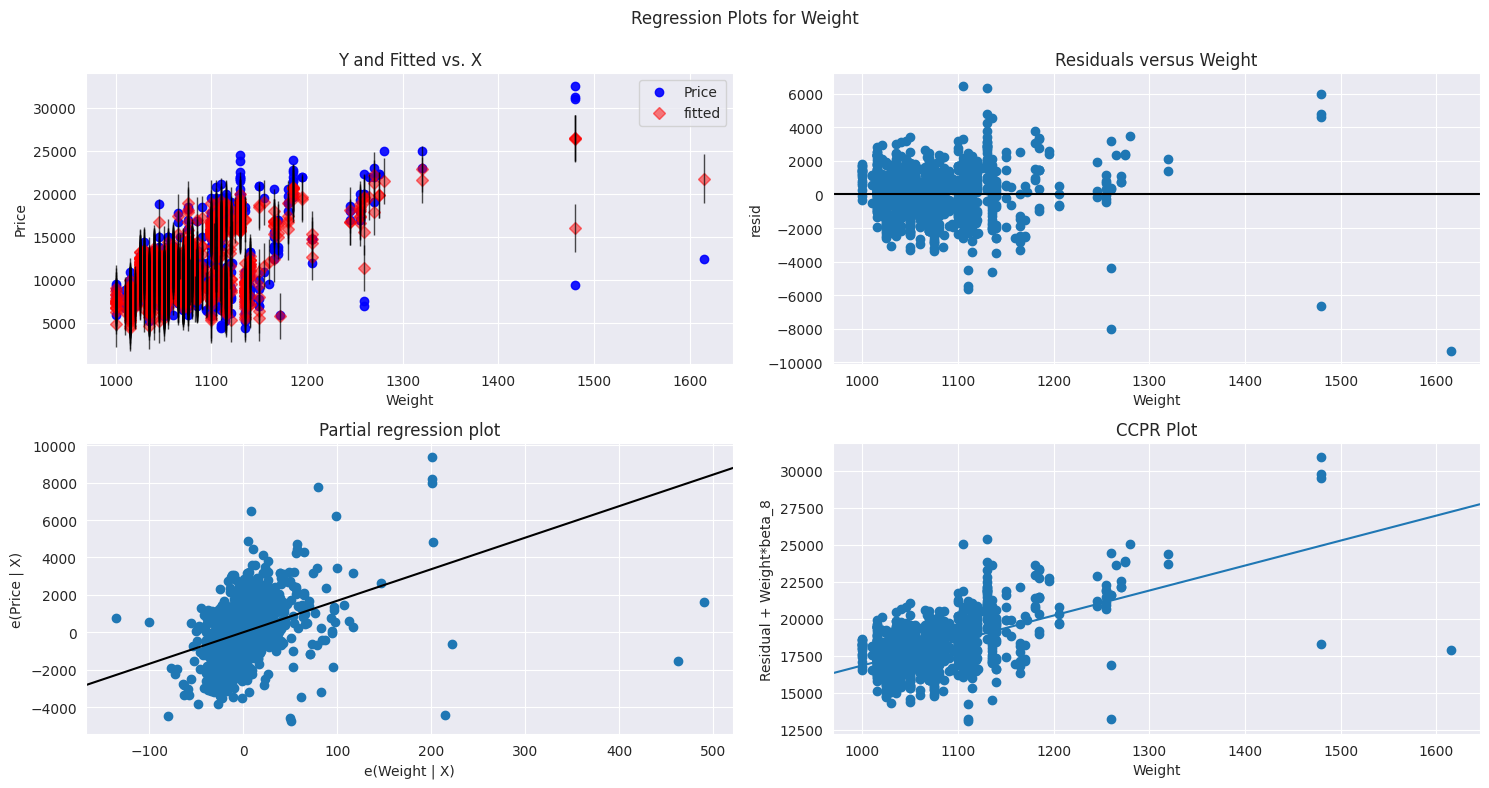

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Weight", fig=fig)
plt.show()

# **Model Delection Diagnosis** (Detecting Influencers/Outliers)

In [ ]:
#Cook Distance
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

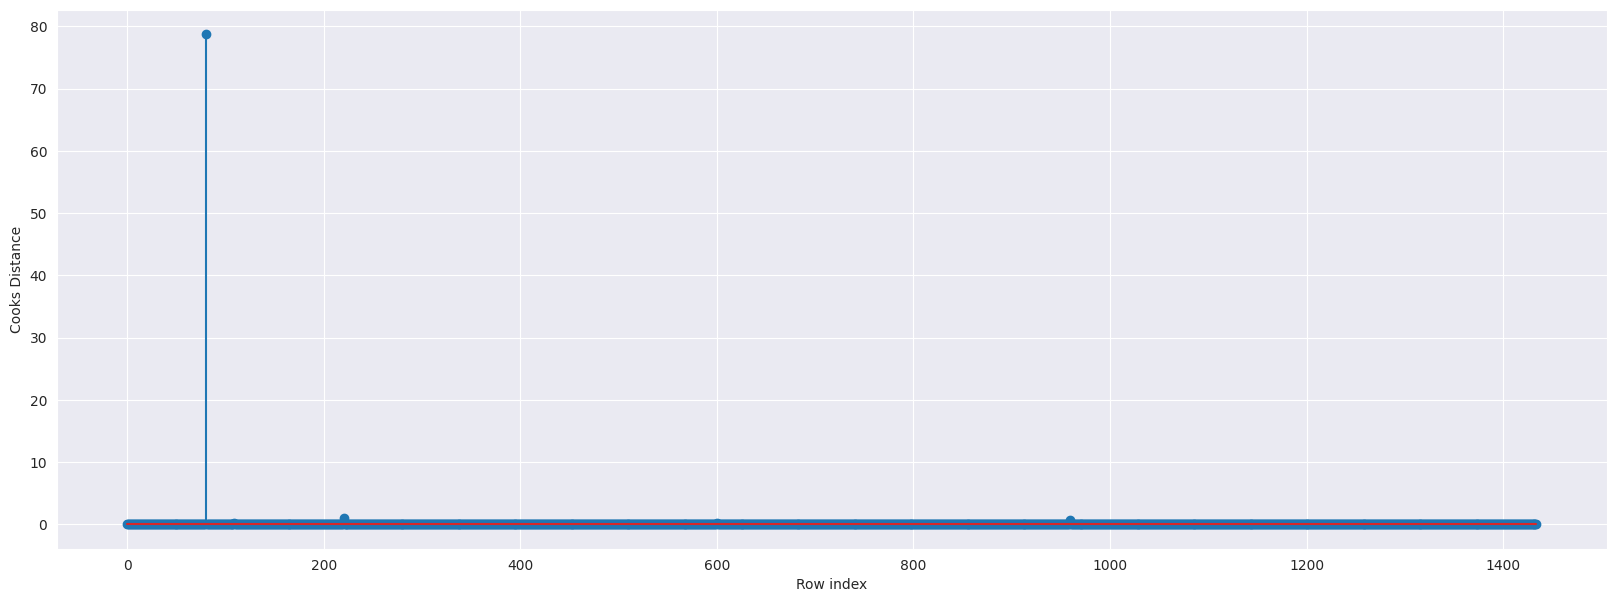

In [ ]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data4)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
np.argmax(c),np.max(c)

(80, 78.72950582258932)

# High Influence Plot

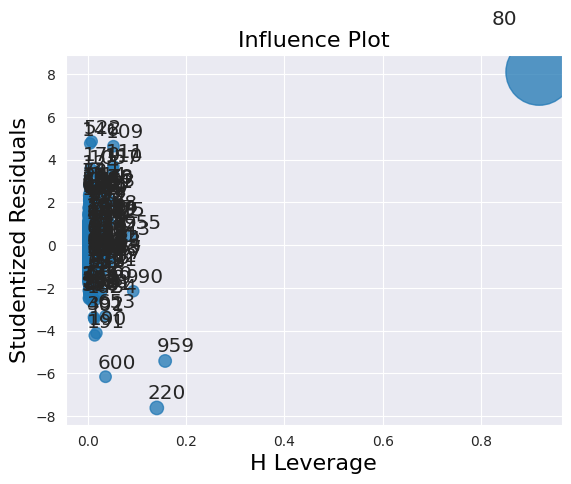

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [ ]:
k = data4.shape[1]
n = data4.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.020905923344947737

# **Improving the model**

In [ ]:
new_data = data4.copy()

In [ ]:
new_data1 = new_data.drop(new_data.index[[80]],axis=0).reset_index(drop=True)
new_data1

,Price,age,KM,HP,cc,doors,gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


# **Model Building**

In [ ]:
while np.max(c)>0.5 :
    fmodel=smf.ols('Price~age+KM+HP+cc+doors+gears+QT+Weight',data=new_data1).fit()
    (c,_)=fmodel.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    new_data1=new_data1.drop(new_data1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    new_data1
else:
    fmodel=smf.ols('Price~age+KM+HP+cc+doors+gears+QT+Weight',data=new_data1).fit()
    fmodel.rsquared , fmodel.aic
    print("Thus model accuracy is improved to",fmodel.rsquared)


Thus model accuracy is improved to 0.8880056892123821


# **Model prediction**

In [ ]:
new_df=pd.DataFrame({'age':12,"KM":40000,"HP":80,"cc":1300,"doors":4,"gears":5,"QT":69,"Weight":1012},index=[0])
new_df

,age,KM,HP,cc,doors,gears,QT,Weight
0,12,40000,80,1300,4,5,69,1012


In [ ]:
fmodel.predict(new_df)

0    14343.213236
dtype: float64

In [ ]:
pred_y=fmodel.predict(new_data1)
pred_y

0       16344.182506
1       15885.729775
2       16327.001967
3       15995.161581
4       15882.280001
            ...     
1424     9162.940829
1425     8537.575299
1426     8682.993993
1427     8795.129772
1428    10859.370363
Length: 1429, dtype: float64